In [3]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# 1st analysis
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q1', 'Q2', 'Q4B']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    
df_new.head()
df_new.columns = ['State', 'Age', 'Language spoken at home', 'Present living conditions']
# Find row with non numeric data
df_new[df_new['Age'] == 'Refused']
# Drop row with non numeric data
df_new = df_new.drop(index=978)
df_new['Age'] = df_new['Age'].astype(int)

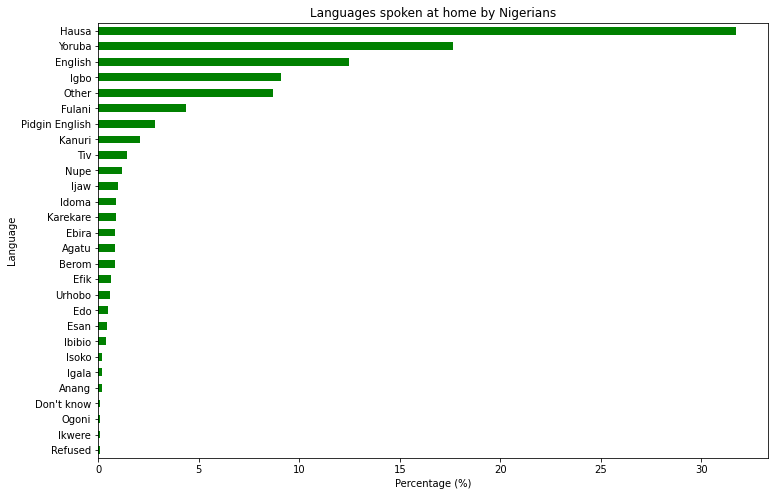

In [17]:
plt.figure(figsize=[12,8])
plot = df_new['Language spoken at home'].value_counts(normalize=True).sort_values()*100
plot.plot(kind='barh', color='green')
plt.xlabel('Percentage (%)')
plt.ylabel('Language')
plt.title('Languages spoken at home by Nigerians');

In [18]:
df_new['Language spoken at home'].value_counts(normalize=True)

Hausa             0.317272
Yoruba            0.176471
English           0.124531
Igbo              0.090738
Other             0.086984
Fulani            0.043805
Pidgin English    0.028160
Kanuri            0.020651
Tiv               0.014393
Nupe              0.011890
Ijaw              0.010013
Karekare          0.008761
Idoma             0.008761
Ebira             0.008135
Agatu             0.008135
Berom             0.008135
Efik              0.006258
Urhobo            0.005632
Edo               0.005006
Esan              0.004380
Ibibio            0.003755
Isoko             0.001877
Igala             0.001877
Anang             0.001877
Ogoni             0.000626
Ikwere            0.000626
Don't know        0.000626
Refused           0.000626
Name: Language spoken at home, dtype: float64